### import pandas as pd

In [17]:
data = pd.read_csv("D:/SEM-5/ML/Assignments/My Codes/SMSSpamCollection.csv" , sep = '\t' ,names=['label' , 'messages'])
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.shape


(5572, 2)

In [21]:
data.columns.tolist()


['label', 'messages']

In [35]:
data.isnull().sum()

label       0
messages    0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['label'])
data.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['messages'])
y = data['label']

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
model_nb = MultinomialNB()
model_nb.fit(x_train,y_train)


MultinomialNB()

In [89]:
y_pred_nb = model_nb.predict(x_test)


In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [115]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
print("Accuracy of the Naive bayes",accuracy_nb)
print("Report of Naive bayes \n" , classification_report(y_test,y_pred_nb))

confusion_nb = confusion_matrix(y_test,y_pred_nb)

Accuracy of the Naive bayes 0.9668161434977578
Report of Naive bayes 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [117]:
import matplotlib.pyplot as plt
import seaborn as sea

In [147]:
def heatMapPlot(cm , model_name):
    plt.figure(figsize = (8,6))
    sea.heatmap(cm, annot = True , fmt = 'd' , xticklabels = ['ham' , 'spam'] ,yticklabels = ['ham' ,'spam'])
    plt.title(f"{model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

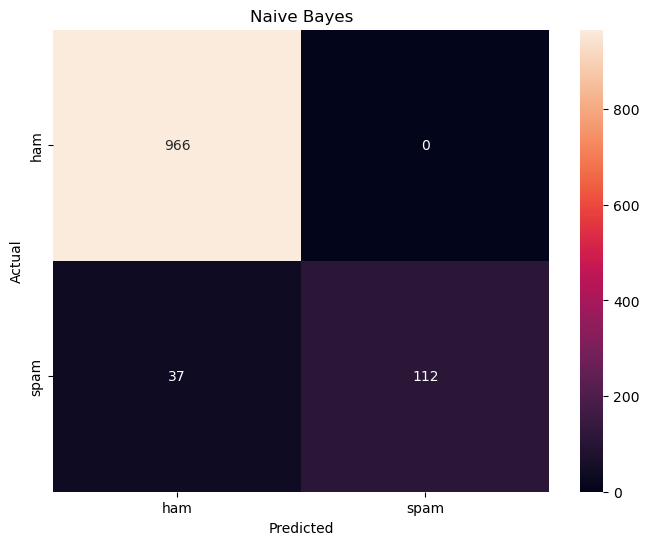

In [151]:
heatMapPlot(confusion_nb , "Naive Bayes")

In [153]:
from sklearn.linear_model import LogisticRegression

In [162]:
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [172]:
y_pred_lr = model_lr.predict(x_test)
Accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression " ,Accuracy_lr)
print("Report of Logistic Regression \n",classification_report(y_test,y_pred_lr))
confusion_lr = confusion_matrix(y_test,y_pred_lr)

Accuracy of Logistic Regression  0.9641255605381166
Report of Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



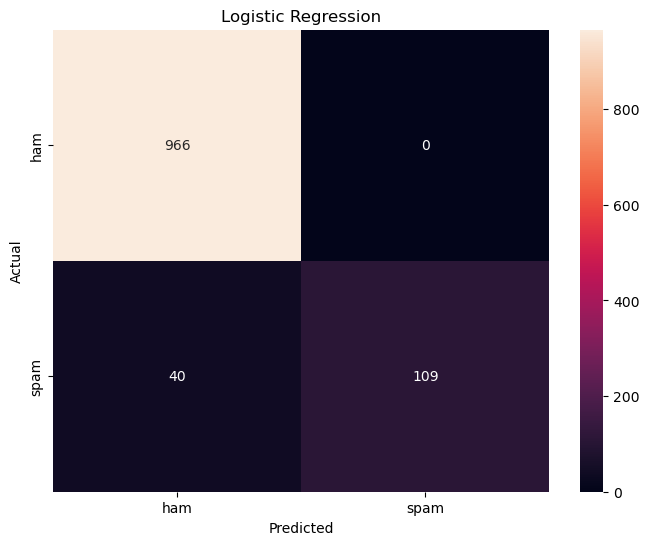

In [174]:
heatMapPlot(confusion_lr , "Logistic Regression")

In [176]:
from sklearn.model_selection import cross_val_score

In [188]:
cv_score_nb = cross_val_score(model_nb,x,y,cv = 5)
cv_score_lr = cross_val_score(model_lr,x,y,cv = 5)
print("Cross Validation score of Naive Bayes" ,cv_score_nb.mean())
print("Cross Validation score of logistic regression" , cv_score_lr.mean())

Cross Validation score of Naive Bayes 0.9589013855455635
Cross Validation score of logistic regression 0.9610548180112872


In [238]:
text_messages = [
     "Congratulations! You've won a $1000 cash prize!",
    "Hey, are we still on for the meeting tomorrow?",
    "Claim your free trial now by clicking this link!",
    "Just checking in. How have you been?",
    "Important: Your account has been compromised. Act now!"
]

text_vector = vectorizer.transform(text_messages)

prediction = model_nb.predict(text_vector)

for i in range (len(text_messages)):
    if(prediction[i] == 1):
        print(f"{text_messages[i]} : ham")
    else:
        print(f"{text_messages[i]} : spam")

Congratulations! You've won a $1000 cash prize! : ham
Hey, are we still on for the meeting tomorrow? : spam
Claim your free trial now by clicking this link! : spam
Just checking in. How have you been? : spam
Important: Your account has been compromised. Act now! : spam
